<a href="https://colab.research.google.com/github/vparro/sinais/blob/master/AnalogiaVetoresSinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [1]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym

# **Analogia entre vetores e sinais**

Considerando a determinação da projeção vetorial:


$c=\frac{\vec{g}\odot\vec{x}}{\vec{x}\odot\vec{x}}$


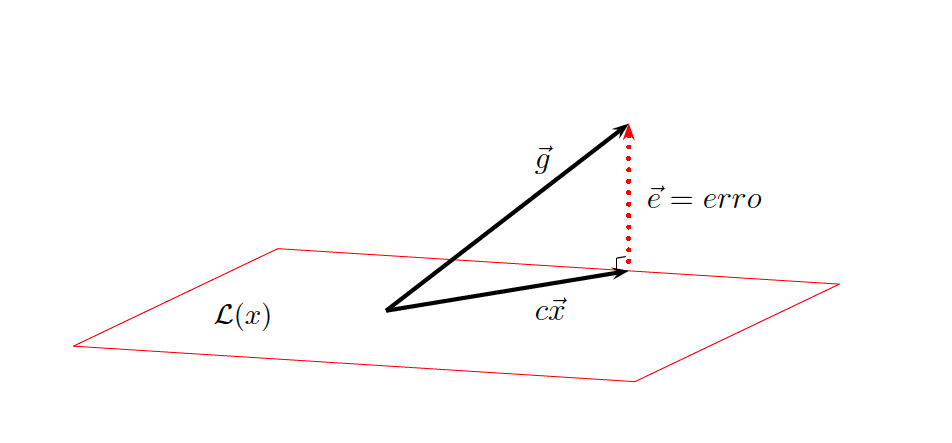

Supondo que desejamos determinar qual a amplitude de um sinal senoidal que o torne mais parecido com uma onda quadrada.

In [3]:
N1 = 100                   # número de pontos em nível alto
N2 = 100                   # número de ponto em nível baixo
A1 = np.ones(N1)           # gera 100 amostras de valor 1
A2 = -np.ones(N2)          # gera 100 amostras de valor -1
T0 = 1                     # período do sinal
pontos = N1 + N2           # total de pontos

Ap = 1                     # Amplitude positiva da onda quadrada
An = -1                     # Ampliude negativa da onda quadrada

gt = np.concatenate((A1, A2))         # sinal a ser testado
tempo = np.linspace(0,T0,pontos)      # vetor tempo
yt = 2*np.sin(2*np.pi*tempo)          # sinal aproximado

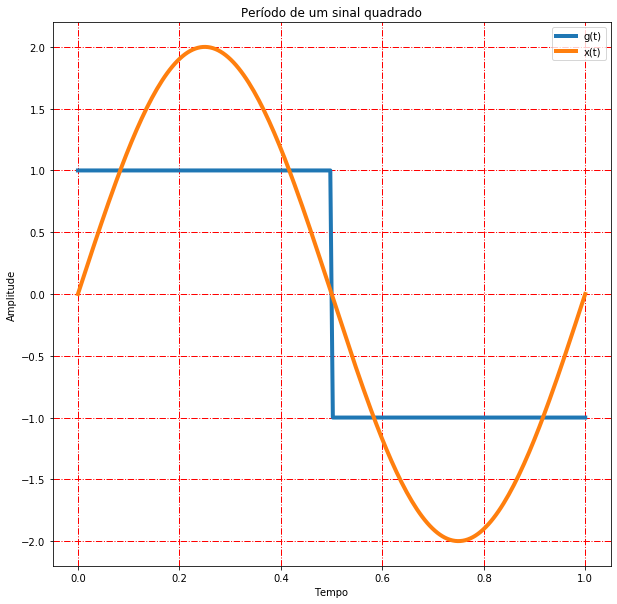

In [4]:
# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(tempo,gt,label="g(t)",linewidth = 4)     # sinal em investigação
plt.plot(tempo,yt,label="x(t)",linewidth = 4)     # elemento de decomposição
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Período de um sinal quadrado")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')

plt.show()


Para medirmos o grau de semelhança entre o sinal $g(t)$ e um sinal harmônico de mesma frequência angular $\omega_0= 2 \pi \frac{rd}{s}$ utilizaremos como variável de ajuste a amplitude $c$ deste sinal. Para estabelecer um critério sobre o grau de semelhança utilizamos o erro quadrático entre o sinal $g(t)$ e o sinal harmônico $x(t)=c \; sin(2 \pi t)$.
$$
Erro = \int_{T_o} (g(t) -c \; sin(2 \pi t))^2 dt
$$



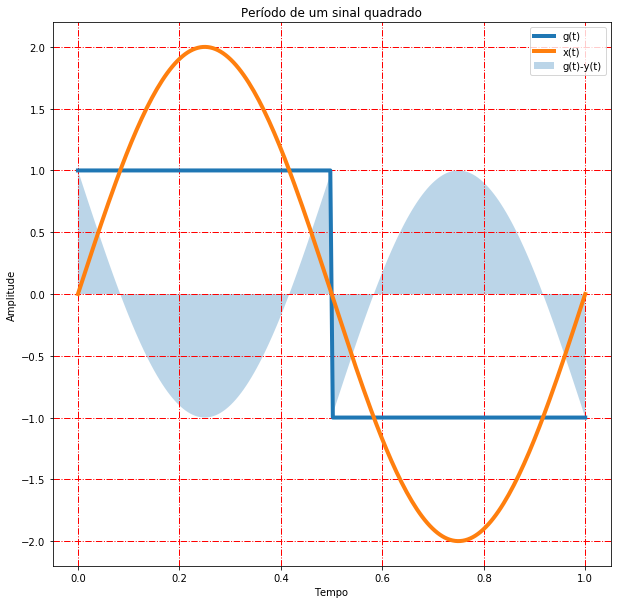

In [5]:
# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(tempo,gt,label="g(t)",linewidth = 4)
plt.plot(tempo,yt,label="x(t)",linewidth = 4)
plt.fill_between(tempo,gt-yt,label="g(t)-y(t)",alpha=0.30)    # erro entre os sinais
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Período de um sinal quadrado")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')

plt.show()

In [6]:
# Variáveis simbólicas

t = sym.Symbol('t')
c = sym.Symbol('c')

# Parte positiva do erro

J1 = sym.integrate((1-c*sym.sin(2*sym.pi*t))**2, (t,0,T0/2))
J1.subs(c,1).evalf()

# Parte negativa do erro

J2 = sym.integrate((-1-c*sym.sin(2*sym.pi*t))**2, (t,T0/2,T0))
J2.subs(c,1).evalf()


0.113380227632419

**Podemos simplesmente variar o valor de $c$ e determinar o resultado final da integral**

$$
Erro(c) = \int_{T_o} (g(t) -c \; sin(2 \pi t))^2 dt
$$


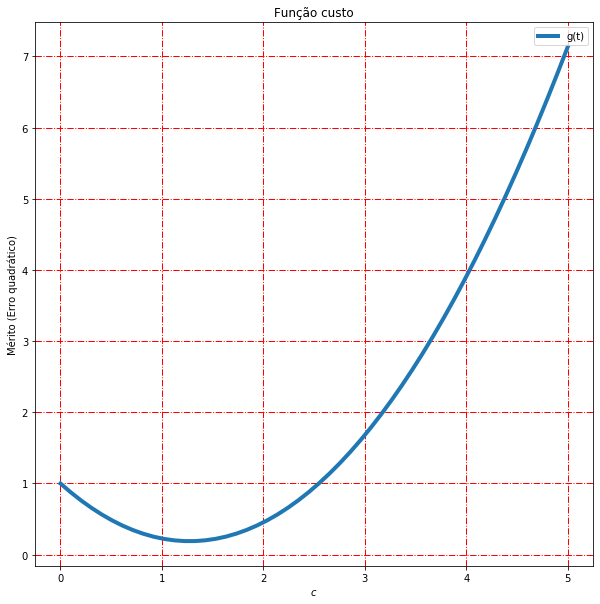

In [9]:
alist = [J1+J2]                             # lista de funções

# Substituimos o conjunto de valores da variável "c" e determinamos os valores numéricos

resJ = [[expr.subs({c:val}).evalf() for expr in alist] for val in np.linspace(0,5,50)]

# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(np.linspace(0,5,50),resJ,label="g(t)",linewidth = 4)
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Função custo")
plt.xlabel("$c$")
plt.ylabel("Mérito (Erro quadrático)")
plt.legend(loc='upper right')

plt.show()

**Qual o valor de $c$ que minimiza o erro?** Vamos utilizar a abordagem de determinação de máximos e mínimos estudado em Cálculo 1.

$$
\frac{d \; Erro}{dc}  = \frac{d \;\int_{T_o} (g(t) -c \; sin(2 \pi t)^2 dt }{dc}=0
$$

In [10]:
# edtermina o ponto de mínimo que minimiza o erro quadrático

dJ = sym.diff(J1+J2, c, 1)
sym.solveset(dJ, c)

FiniteSet(4.0/pi)

**Formação de uma base**

Uma questão importante é como escolher o conjunto de sinais que compõem a base sobre a qual o sinal será analisado. Usando uma analogia com vetores, estes sinais tem de ser ortogonais e respeitar a condição imposta pela equação

\begin{equation}
\int_{T_o} x_m(t)x_n(t) dt = 0,
\end{equation}

para qualquer $m \neq n$.

In [11]:
# Analisando os "Harmônicos" 

a = sym.cos(2*sym.pi*t)
b = sym.sin(3*sym.pi*t)

alist = [a]
resa = [[expr.subs({t:val}).evalf() for expr in alist] for val in tempo]

blist = [b]
resb = [[expr.subs({t:val}).evalf() for expr in blist] for val in tempo]

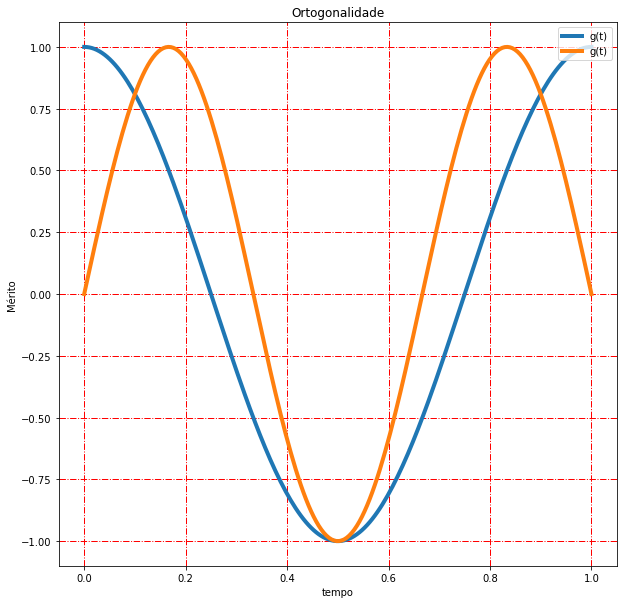

In [12]:
# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(tempo,resa,label="g(t)",linewidth = 4)
plt.plot(tempo,resb,label="g(t)",linewidth = 4)
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Ortogonalidade")
plt.xlabel("Tempo")
plt.ylabel("Mérito")
plt.legend(loc='upper right')

plt.show()

Resolvendo a equação para $m=1$ e variando $n$.

\begin{equation}
\int_{T_o} x(t)x_n(t) dt = 0
\end{equation}


In [13]:
n = sym.Symbol('n')
Base = sym.integrate(sym.sin(2*sym.pi*t)*sym.cos(2*n*sym.pi*t),(t,0,T0))
Base.subs(n,1).evalf()

0

In [14]:
Baselist = [Base]
resB = [[expr.subs({n:val}).evalf() for expr in Baselist] for val in np.linspace(0,5,1000)]

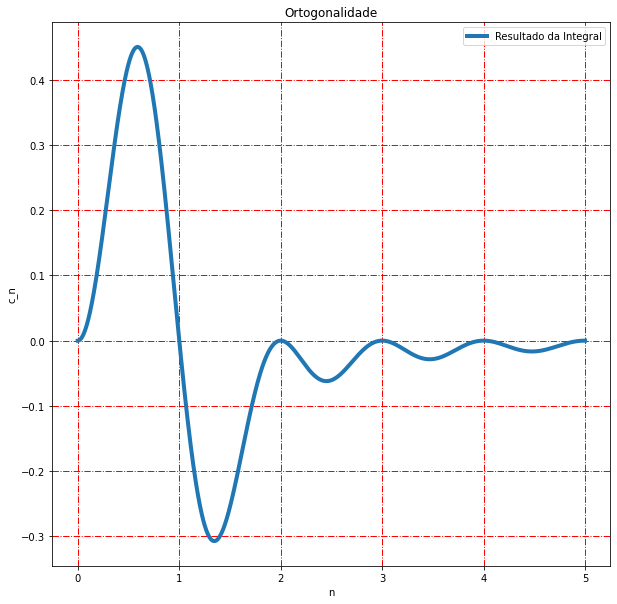

In [90]:
# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(np.linspace(0,5,1000),resB,label="Resultado da Integral",linewidth = 4)
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Ortogonalidade")
plt.xlabel("n")
plt.ylabel("c_n")
plt.legend(loc='upper right')

plt.show()

**Análise**

Para o caso em que a base atende a equação anterior, os coeficientes $c_n$ podem ser calculados utilizando a equação a

\begin{equation}
c_n=\frac{\int_{T_o} g(t)x_n(t) dt}{\int_{T_o} x_n^2(t) dt},
\end{equation}

que é a solução analítica da equação de otimização que chamamos de **Análise**.

In [15]:
N           = 10                                  # Número de harmônicos

# Projeções

cn1         = sym.integrate((Ap*sym.sin(2*n*sym.pi*t)), (t,0,T0/2))
cn2         = sym.integrate((An*sym.sin(2*n*sym.pi*t)), (t,T0/2,T0))
Denominador = sym.integrate((sym.sin(2*n*sym.pi*t)**2), (t,0,T0))

nValores    = np.linspace(1,N,N)

Baselist = [cn1+cn2,Denominador]
rescn = [[expr.subs({n:val}).evalf() for expr in Baselist] for val in nValores]

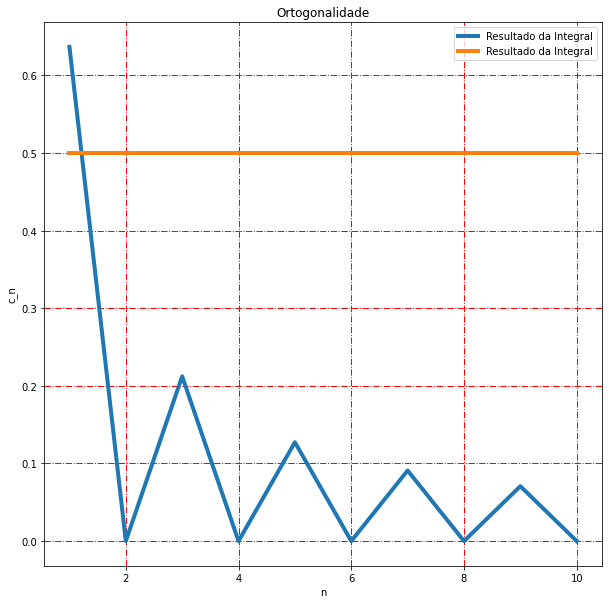

In [92]:
# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(nValores,rescn,label="Resultado da Integral",linewidth = 4)
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Ortogonalidade")
plt.xlabel("n")
plt.ylabel("c_n")
plt.legend(loc='upper right')

plt.show()

**Síntese**

 Em aula estudamos que um sinal periódico $g(t)$ pode ser decomposto em uma soma ponderada de sinais como indicado na equação abaixo e chamamos este processo de **Síntese**.

\begin{equation}
g(t)=c_1x_1(t)+c_2x_2(t)+c_3x_3(t)+c_4x_4(t)+c_5x_5(t)+ \cdots
\end{equation}

em sua forma compacta temos a equação

\begin{equation}
g(t)=\sum_{n=0}^N c_nx_n(t) .
\end{equation}


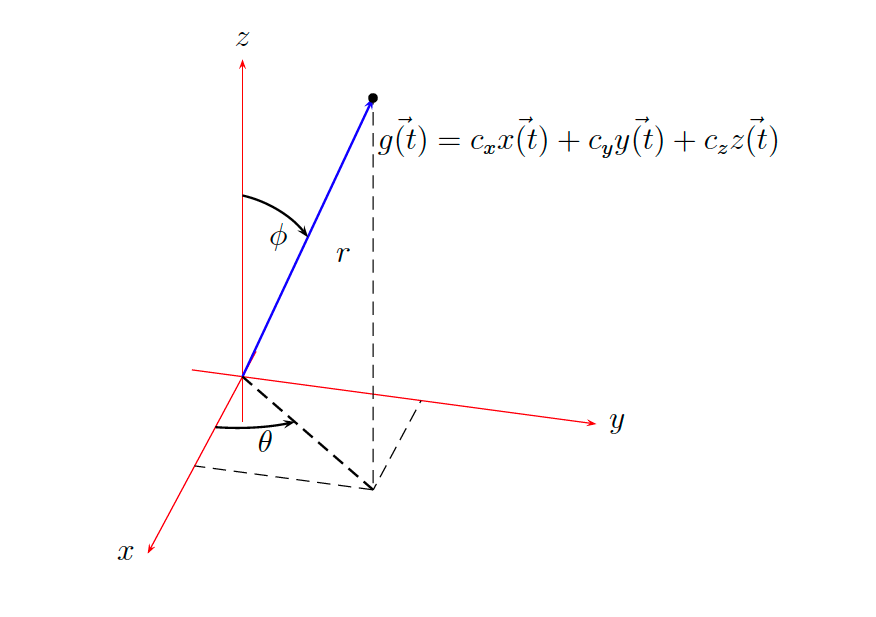

In [16]:
cn  =    np.array(rescn)
aux = 0

for i in range(len(nValores)):
    aux = aux + cn[i][0]*np.sin(2*nValores[i]*np.pi*tempo)/cn[i][1]

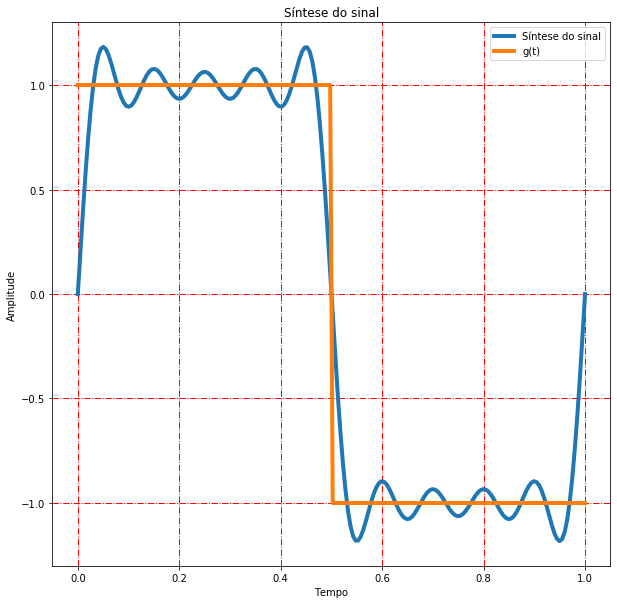

In [17]:
# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.plot(tempo,aux,label="Síntese do sinal",linewidth = 4)
plt.plot(tempo,gt,label="g(t)",linewidth = 4)              # sinal em investigação
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Síntese do sinal")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')

plt.show()

# **Referências**

https://scipy-lectures.org/packages/sympy.html

https://docs.sympy.org/latest/modules/integrals/integrals.html

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#:~:text=The%20function%20quad%20is%20provided,2.5%2C%20x)%20along%20the%20interval&text=Si%20(%20x%20)%20%3D%20%E2%88%AB%200%20x%20sin%20%E2%81%A1

https://stackoverflow.com/questions/49167615/typeerror-unsupported-operand-types-for-map-and-float

https://stackoverflow.com/questions/33208737/continuous-fourier-transform-with-python-sympy-analytical-solution